## Feature Selection 2 - Wrapper Method
There are three types
1. Forward Selection
2. Backward Elimination
3. RFE(Recurve Feature Elimination)

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stat
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler,Normalizer,MinMaxScaler,LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression,Ridge,Lasso,SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

In [2]:
data = pd.read_csv('Bigmart Sales Cleaned Dataset.csv')

In [3]:
modelLR = LinearRegression()
encoder =LabelEncoder()
OneHotEncoder = OneHotEncoder()

In [4]:
scaler = StandardScaler()

In [5]:
data.head()

,Item_Identifier,Item_Code,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,FD,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,DR,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,FD,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,FD,19.20,Regular,0.070482,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,NC,8.93,No Fat,0.070482,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [6]:
data.Item_Code.replace({'FD':'Food','DR':'Drinks','NC':'Non-Consumable'},inplace=True)

In [7]:
data.head()

,Item_Identifier,Item_Code,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,Food,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,Drinks,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,Food,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,Food,19.20,Regular,0.070482,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,Non-Consumable,8.93,No Fat,0.070482,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [8]:
def reg_Validation(y_predict,y_test) :
    print("Mean Squared Error = ",mean_squared_error(y_predict,y_test))
    print("Root Mean Square Error = ", np.sqrt(mean_squared_error(y_predict,y_test)))
    print("R2 Score  =",r2_score(y_predict,y_test))

### Forward Selection
Forward selection is an iterative method in which we start with having no feature in the model. In each iteration, we keep adding the feature which best improves our model till an addition of a new variable does not improve the performance of the model.

In [9]:
y = data.Item_Outlet_Sales 

#### Step 1

In [10]:
X = data.loc[:,['Item_Code']]

In [11]:
for col in X.select_dtypes(['object']) :
    X[col] = encoder.fit_transform(X[col])

In [12]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=10)
X_train.head()

,Item_Code
2745,1
6285,2
4992,0
4623,1
3410,1


#### Linear Regression

In [13]:
modelLR.fit(X_train,y_train)
y_predict = modelLR.predict(X_test)

In [14]:
reg_Validation(y_predict,y_test)

Mean Squared Error =  2784391.175890187
Root Mean Square Error =  1668.649506604124
R2 Score  = -393355.061993758


#### Step 2 

In [15]:
X = data.loc[:,['Item_Code','Item_Weight']]
for col in X.select_dtypes(['object']) :
    X[col] = encoder.fit_transform(X[col])
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=10)
X_train.head()

,Item_Code,Item_Weight
2745,1,4.88
6285,2,18.60
4992,0,8.52
4623,1,17.00
3410,1,7.72


In [16]:
modelLR.fit(X_train,y_train)
y_predict = modelLR.predict(X_test)
reg_Validation(y_predict,y_test)

Mean Squared Error =  2784435.2981075034
Root Mean Square Error =  1668.6627274879436
R2 Score  = -4942.0780305704675


#### Step 3

In [17]:
X = data.loc[:,['Item_Code','Item_Weight','Item_Fat_Content']]
for col in X.select_dtypes(['object']) :
    X[col] = encoder.fit_transform(X[col])
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=10)
X_train.head()

,Item_Code,Item_Weight,Item_Fat_Content
2745,1,4.88,2
6285,2,18.60,1
4992,0,8.52,0
4623,1,17.00,2
3410,1,7.72,2


In [18]:
modelLR.fit(X_train,y_train)
y_predict = modelLR.predict(X_test)
reg_Validation(y_predict,y_test)

Mean Squared Error =  2783646.894757885
Root Mean Square Error =  1668.4264726855317
R2 Score  = -4557.818524598603


#### Step 4

In [19]:
X = data.loc[:,['Item_Code','Item_Fat_Content','Item_Visibility']]
for col in X.select_dtypes(['object']) :
    X[col] = encoder.fit_transform(X[col])
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=10)
X_train.head()

,Item_Code,Item_Fat_Content,Item_Visibility
2745,1,2,0.133382
6285,2,1,0.012651
4992,0,0,0.027059
4623,1,2,0.026623
3410,1,2,0.074731


In [20]:
modelLR.fit(X_train,y_train)
y_predict = modelLR.predict(X_test)
reg_Validation(y_predict,y_test)

Mean Squared Error =  2757518.482537183
Root Mean Square Error =  1660.5777556432529
R2 Score  = -44.82485066875359


#### Step 5

In [21]:
X = data.loc[:,['Item_Code','Item_Fat_Content','Item_Visibility','Item_Type']]
for col in X.select_dtypes(['object']) :
    X[col] = encoder.fit_transform(X[col])
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=10)
X_train.head()

,Item_Code,Item_Fat_Content,Item_Visibility,Item_Type
2745,1,2,0.133382,0
6285,2,1,0.012651,9
4992,0,0,0.027059,14
4623,1,2,0.026623,3
3410,1,2,0.074731,1


In [22]:
modelLR.fit(X_train,y_train)
y_predict = modelLR.predict(X_test)
reg_Validation(y_predict,y_test)

Mean Squared Error =  2759302.9806697373
Root Mean Square Error =  1661.1149811707007
R2 Score  = -44.09799028790556


### Backward Elimination 
In backward elimination, we start with all the features and removes the least significant feature at each iteration which improves the performance of the model. We repeat this until no improvement is observed on removal of features.

In [23]:
data.head()

,Item_Identifier,Item_Code,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,Food,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,Drinks,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,Food,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,Food,19.20,Regular,0.070482,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,Non-Consumable,8.93,No Fat,0.070482,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


#### Step 1

In [24]:
X= data.loc[:,['Item_Code','Item_Weight','Item_Fat_Content','Item_Visibility','Item_Type','Item_MRP','Outlet_Establishment_Year','Outlet_Size','Outlet_Location_Type','Outlet_Type']]
for col in X.select_dtypes(['object']) :
    X[col] = encoder.fit_transform(X[col])
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=10)
X_train.head()

,Item_Code,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
2745,1,4.88,2,0.133382,0,55.0298,1987,0,2,1
6285,2,18.60,1,0.012651,9,123.1414,2004,2,1,1
4992,0,8.52,0,0.027059,14,153.3682,1997,2,0,1
4623,1,17.00,2,0.026623,3,144.2470,2002,2,1,1
3410,1,7.72,2,0.074731,1,77.5986,1997,2,0,1


In [25]:
modelLR.fit(X_train,y_train)
y_predict = modelLR.predict(X_test)
reg_Validation(y_predict,y_test)

Mean Squared Error =  1368663.291031137
Root Mean Square Error =  1169.8988379475968
R2 Score  = 0.02920909412824446


#### Step 2 

In [26]:
X= data.loc[:,['Item_Code','Item_Weight','Item_Fat_Content','Item_Type','Item_MRP','Outlet_Establishment_Year','Outlet_Size','Outlet_Location_Type','Outlet_Type']]
for col in X.select_dtypes(['object']) :
    X[col] = encoder.fit_transform(X[col])
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=10)
X_train.head()

,Item_Code,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
2745,1,4.88,2,0,55.0298,1987,0,2,1
6285,2,18.60,1,9,123.1414,2004,2,1,1
4992,0,8.52,0,14,153.3682,1997,2,0,1
4623,1,17.00,2,3,144.2470,2002,2,1,1
3410,1,7.72,2,1,77.5986,1997,2,0,1


In [27]:
modelLR.fit(X_train,y_train)
y_predict = modelLR.predict(X_test)
reg_Validation(y_predict,y_test)

Mean Squared Error =  1372511.3155511422
Root Mean Square Error =  1171.5422807355876
R2 Score  = 0.023990394084558275


#### Step 3

In [28]:
X= data.loc[:,['Item_Code','Item_Weight','Item_Fat_Content','Item_Type','Item_MRP','Outlet_Size','Outlet_Location_Type','Outlet_Type']]
for col in X.select_dtypes(['object']) :
    X[col] = encoder.fit_transform(X[col])
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=10)
X_train.head()

,Item_Code,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type
2745,1,4.88,2,0,55.0298,0,2,1
6285,2,18.60,1,9,123.1414,2,1,1
4992,0,8.52,0,14,153.3682,2,0,1
4623,1,17.00,2,3,144.2470,2,1,1
3410,1,7.72,2,1,77.5986,2,0,1


In [29]:
modelLR.fit(X_train,y_train)
y_predict = modelLR.predict(X_test)
reg_Validation(y_predict,y_test)

Mean Squared Error =  1369216.3617904347
Root Mean Square Error =  1170.1351895359933
R2 Score  = 0.025443325669822214


#### Step 4

In [30]:
X= data.loc[:,['Item_Code','Item_Fat_Content','Item_Type','Item_MRP','Outlet_Size','Outlet_Location_Type','Outlet_Type']]
for col in X.select_dtypes(['object']) :
    X[col] = encoder.fit_transform(X[col])
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=10)
X_train.head()

,Item_Code,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type
2745,1,2,0,55.0298,0,2,1
6285,2,1,9,123.1414,2,1,1
4992,0,0,14,153.3682,2,0,1
4623,1,2,3,144.2470,2,1,1
3410,1,2,1,77.5986,2,0,1


In [31]:
modelLR.fit(X_train,y_train)
y_predict = modelLR.predict(X_test)
reg_Validation(y_predict,y_test)

Mean Squared Error =  1369206.2044544413
Root Mean Square Error =  1170.1308492875664
R2 Score  = 0.025453326767294504


### Recursive Feature Elimination 
It is a greedy optimization algorithm which aims to find the best performing feature subset. It repeatedly creates models and keeps aside the best or the worst performing feature at each iteration. It constructs the next model with the left features until all the features are exhausted. It then ranks the features based on the order of their elimination.

In [32]:
data.head()

,Item_Identifier,Item_Code,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,Food,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,Drinks,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,Food,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,Food,19.20,Regular,0.070482,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,Non-Consumable,8.93,No Fat,0.070482,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [33]:
X = data.loc[:,['Item_Code','Item_Weight','Item_Fat_Content','Item_Visibility','Item_Type','Item_MRP','Outlet_Identifier','Outlet_Establishment_Year','Outlet_Size','Outlet_Location_Type','Outlet_Type']]
for col in X.select_dtypes(['object']) :
    X[col] = encoder.fit_transform(X[col])

In [34]:
from sklearn.feature_selection import RFE
modelLR = LinearRegression()
selector = RFE(modelLR,7,step=1)
selector.fit(X,y)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
  n_features_to_select=7, step=1, verbose=0)

In [35]:
support = selector.support_
support

array([ True, False,  True,  True, False, False,  True, False,  True,
        True,  True])

In [36]:
ranking = selector.ranking_
ranking

array([1, 5, 1, 1, 4, 2, 1, 3, 1, 1, 1])

In [37]:
pd.DataFrame({'Predictors':X.columns,'Rank':ranking,'support':support})

,Predictors,Rank,support
0,Item_Code,1,True
1,Item_Weight,5,False
2,Item_Fat_Content,1,True
3,Item_Visibility,1,True
4,Item_Type,4,False
5,Item_MRP,2,False
6,Outlet_Identifier,1,True
7,Outlet_Establishment_Year,3,False
8,Outlet_Size,1,True
9,Outlet_Location_Type,1,True


In [38]:
modelSVR = SVR(kernel='linear')
selector = RFE(modelSVR,7,step=1)
selector.fit(X,y)

RFE(estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
  n_features_to_select=7, step=1, verbose=0)

In [39]:
support = selector.support_
ranking = selector.ranking_

In [40]:
pd.DataFrame({'Predictors':X.columns,'Rank':ranking,'support':support})

,Predictors,Rank,support
0,Item_Code,2,False
1,Item_Weight,4,False
2,Item_Fat_Content,1,True
3,Item_Visibility,1,True
4,Item_Type,5,False
5,Item_MRP,1,True
6,Outlet_Identifier,1,True
7,Outlet_Establishment_Year,3,False
8,Outlet_Size,1,True
9,Outlet_Location_Type,1,True


In [41]:
X = data.loc[:,['Item_Code','Item_Type','Item_MRP','Outlet_Identifier','Outlet_Location_Type','Outlet_Type']]           

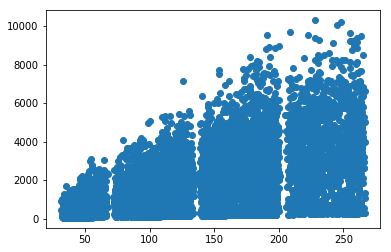

In [42]:
plt.scatter(data.Item_MRP,data.Item_Outlet_Sales)

In [43]:
for col in X.select_dtypes(['object']) :
    X[col] = encoder.fit_transform(X[col])

In [44]:
X.head()

,Item_Code,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Location_Type,Outlet_Type
0,1,4,249.8092,9,0,1
1,0,14,48.2692,3,2,2
2,1,10,141.6180,9,0,1
3,1,6,182.0950,0,2,0
4,2,9,53.8614,1,2,1


In [45]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=10)
X_train.head()

,Item_Code,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Location_Type,Outlet_Type
2745,1,0,55.0298,1,2,1
6285,2,9,123.1414,6,1,1
4992,0,14,153.3682,8,0,1
4623,1,3,144.2470,7,1,1
3410,1,1,77.5986,8,0,1


In [46]:
modelLR.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [47]:
y_predict = modelLR.predict(X_test)

In [48]:
reg_Validation(y_predict,y_test)

Mean Squared Error =  1361993.5614224293
Root Mean Square Error =  1167.0447983785496
R2 Score  = 0.03707279044731282


### Polynomial Regression

In [49]:
poly = PolynomialFeatures(degree=2)

In [50]:
X = poly.fit_transform(X)

In [51]:
X

array([[ 1.,  1.,  4., ...,  0.,  0.,  1.],
       [ 1.,  0., 14., ...,  4.,  4.,  4.],
       [ 1.,  1., 10., ...,  0.,  0.,  1.],
       ...,
       [ 1.,  2.,  8., ...,  1.,  1.,  1.],
       [ 1.,  1., 13., ...,  4.,  4.,  4.],
       [ 1.,  0., 14., ...,  0.,  0.,  1.]])

In [52]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=5)

In [53]:
modelLR.fit(X_train,y_train)
y_predict = modelLR.predict(X_test)

In [54]:
reg_Validation(y_predict,y_test)

Mean Squared Error =  1135328.1941542618
Root Mean Square Error =  1065.5178056486254
R2 Score  = 0.34873354427711045


In [55]:
data.head()

,Item_Identifier,Item_Code,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,Food,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,Drinks,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,Food,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,Food,19.20,Regular,0.070482,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,Non-Consumable,8.93,No Fat,0.070482,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [56]:
#data.to_csv('Bigmart Sales Modelling Dataset.csv',index=False)